In [1]:
#!pip install psycopg2

In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [3]:
conn = ps.connect(
    dbname = 'postgres',
    user = 'postgres',
    password = 'Castro@1990',
    host = 'localhost',
    port = '5432'
)

In [4]:
sql = """
SELECT * FROM dbo.pnad2020_month
"""

In [5]:
df_01 = sqlio.read_sql_query(sql, conn)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_8656\1657119978.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_01 = sqlio.read_sql_query(sql, conn)


In [6]:
df_01.head()

,ano,mes,uf,capital,rm_ride,v1008,v1012,v1013,v1016,estrato,...,f001,f0021,f0022,f002a1,f002a2,f002a3,f002a4,f002a5,f0061,f006
0,2020,Setembro,11,11,None,2,3,9,5,1110011,...,5,None,None,1,1,1,1,1,1,2
1,2020,Setembro,11,11,None,10,3,9,5,1110011,...,2,None,None,1,1,1,1,1,1,1
2,2020,Setembro,11,11,None,10,3,9,5,1110011,...,2,None,None,1,1,1,1,1,1,1
3,2020,Setembro,11,11,None,10,3,9,5,1110011,...,2,None,None,1,1,1,1,1,1,1
4,2020,Setembro,11,11,None,10,3,9,5,1110011,...,2,None,None,1,1,1,1,1,1,1


In [7]:
df_01["f0022"].unique()

array([None, '2', '1', '4', '3', '5', '0', '6'], dtype=object)

In [8]:
sql = """
SELECT uf, f0022, COUNT(f0022) AS "faixa_do_aluguel"
FROM dbo.pnad2020_month
GROUP BY
uf, f0022
ORDER BY
faixa_do_aluguel DESC
"""

In [9]:
df_02 = sqlio.read_sql_query(sql, conn)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_8656\2735102659.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_02 = sqlio.read_sql_query(sql, conn)


In [10]:
dict_uf = {"11":"Rondônia",
           "12":"Acre",
           "13":"Amazonas",
           "14":"Roraima",
           "15":"Pará",
           "16":"Amapá",
           "17":"Tocantins",
           "21":"Maranhão",
           "22":"Piauí",
           "23":"Ceará",
           "24":"Rio Grande do Norte",
           "25":"Paraíba",
           "26":"Pernambuco",
           "27":"Alagoas",
           "28":"Sergipe",
           "29":"Bahia",
           "31":"Minas Gerais",
           "32":"Espírito Santo",
           "33":"Rio de Janeiro",
           "35":"São Paulo",
           "41":"Paraná",
           "42":"Santa Catarina",
           "43":"Rio Grande do Sul",
           "50":"Mato Grosso do Sul",
           "51":"Mato Grosso",
           "52":"Goiás",
           "53":"Distrito Federal"}

dict_salario = {"0":"1-100",
                "1":"101-300",
                "2":"301-600",
                "3":"601-800",
                "4":"801-1.600",
                "5":"1.601-3.000",
                "6":"3.001-10.000",
                "7":"10.001-50.000",
                "8":"50.001-100.000",
                "9":"Mais de 100.000",
                "88":"Aluguel a vencer",
                None:"Não aplicável"}

In [11]:
df_02_replaced = df_02.replace({"uf":dict_uf, "f0022":dict_salario})

In [12]:
df_02_replaced = df_02_replaced.rename(columns={"uf":"Estado","f0022":"Faixa do Aluguel","faixa_do_aluguel":"Quantidade"})

In [13]:
df_02_replaced.head()

,Estado,Faixa do Aluguel,Quantidade
0,Minas Gerais,301-600,7113
1,São Paulo,301-600,6535
2,São Paulo,801-1.600,5650
3,Rio de Janeiro,301-600,4779
4,Goiás,301-600,4272


In [14]:
df_02_replaced.groupby(by="Faixa do Aluguel")["Quantidade"].sum().sort_values(ascending=False)

Faixa do Aluguel
301-600          66775
801-1.600        31639
601-800          26613
101-300          26364
1.601-3.000       7323
3.001-10.000      1375
1-100             1059
Não aplicável        0
Name: Quantidade, dtype: int64

In [15]:
df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "301-600").nlargest(n=5,columns=["Quantidade"])

,Estado,Faixa do Aluguel,Quantidade
0,Minas Gerais,301-600,7113.0
1,São Paulo,301-600,6535.0
3,Rio de Janeiro,301-600,4779.0
4,Goiás,301-600,4272.0
7,Paraná,301-600,3893.0


In [16]:
df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "801-1.600").nlargest(n=5,columns=["Quantidade"])

,Estado,Faixa do Aluguel,Quantidade
2,São Paulo,801-1.600,5650.0
5,Rio de Janeiro,801-1.600,4231.0
10,Santa Catarina,801-1.600,3388.0
12,Minas Gerais,801-1.600,2952.0
22,Paraná,801-1.600,2079.0


In [17]:
df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "601-800").nlargest(n=5,columns=["Quantidade"])

,Estado,Faixa do Aluguel,Quantidade
6,São Paulo,601-800,4173.0
15,Rio de Janeiro,601-800,2807.0
19,Minas Gerais,601-800,2623.0
20,Santa Catarina,601-800,2453.0
28,Paraná,601-800,1831.0


In [18]:
df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "101-300").nlargest(n=5,columns=["Quantidade"])

,Estado,Faixa do Aluguel,Quantidade
13,Ceará,101-300,2947.0
18,Pernambuco,101-300,2665.0
26,Minas Gerais,101-300,1881.0
27,Alagoas,101-300,1838.0
31,Maranhão,101-300,1619.0


In [19]:
faixa_01 = df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "301-600").nlargest(n=5,columns=["Quantidade"])
faixa_02 = df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "801-1.600").nlargest(n=5,columns=["Quantidade"])
faixa_03 = df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "601-800").nlargest(n=5,columns=["Quantidade"])
faixa_04 = df_02_replaced.where(df_02_replaced["Faixa do Aluguel"] == "101-300").nlargest(n=5,columns=["Quantidade"])

In [20]:
faixas = pd.concat([faixa_01,faixa_02,faixa_03,faixa_04])
faixas

,Estado,Faixa do Aluguel,Quantidade
0,Minas Gerais,301-600,7113.0
1,São Paulo,301-600,6535.0
3,Rio de Janeiro,301-600,4779.0
4,Goiás,301-600,4272.0
7,Paraná,301-600,3893.0
2,São Paulo,801-1.600,5650.0
5,Rio de Janeiro,801-1.600,4231.0
10,Santa Catarina,801-1.600,3388.0
12,Minas Gerais,801-1.600,2952.0
22,Paraná,801-1.600,2079.0


In [21]:
color_list = faixas["Estado"].unique()

In [22]:
import matplotlib.pyplot as plt
import warnings 
  
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


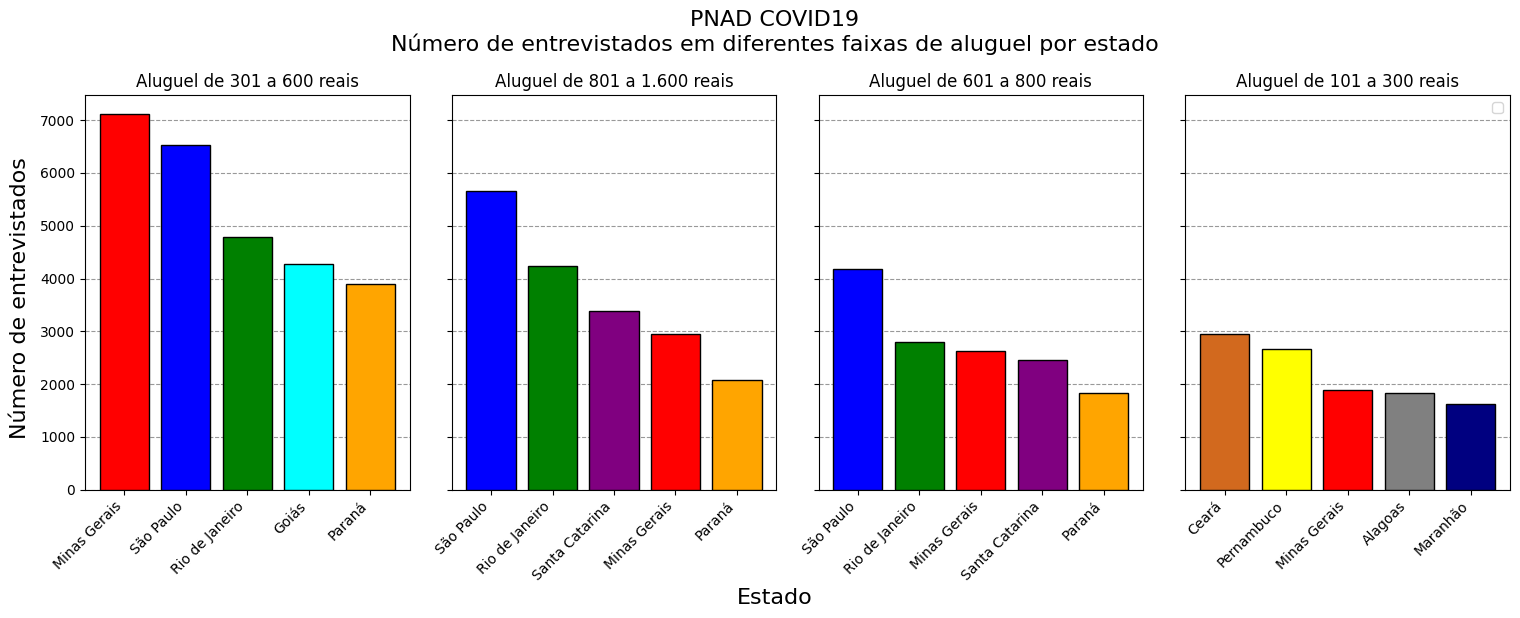

In [23]:
color_dict={color_list[0]:'red', color_list[1]:'blue', color_list[2]:'green', color_list[3]:'aqua', color_list[4]:'orange',
       color_list[5]:'purple', color_list[6]:'chocolate', color_list[7]:'yellow', color_list[8]:'grey', color_list[9]:'navy'}

fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, sharey=True)
ax1.bar(faixa_01["Estado"], faixa_01["Quantidade"], color=[color_dict[key] for key in faixa_01["Estado"]],  edgecolor='black', zorder=3)
ax2.bar(faixa_02["Estado"], faixa_02["Quantidade"], color=[color_dict[key] for key in faixa_02["Estado"]],  edgecolor='black', zorder=3)
ax3.bar(faixa_03["Estado"], faixa_03["Quantidade"], color=[color_dict[key] for key in faixa_03["Estado"]],  edgecolor='black', zorder=3)
ax4.bar(faixa_04["Estado"], faixa_04["Quantidade"], color=[color_dict[key] for key in faixa_04["Estado"]],  edgecolor='black', zorder=3)
fig.suptitle("PNAD COVID19\nNúmero de entrevistados em diferentes faixas de aluguel por estado", size=16)
ax1.set_title("Aluguel de 301 a 600 reais")
ax2.set_title("Aluguel de 801 a 1.600 reais")
ax3.set_title("Aluguel de 601 a 800 reais")
ax4.set_title("Aluguel de 101 a 300 reais")
ax1.set_xticklabels(faixa_01["Estado"], rotation=45, ha='right')
ax2.set_xticklabels(faixa_02["Estado"], rotation=45, ha='right')
ax3.set_xticklabels(faixa_03["Estado"], rotation=45, ha='right')
ax4.set_xticklabels(faixa_04["Estado"], rotation=45, ha='right')
ax1.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.8, alpha=0.8, zorder=0)
ax2.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.8, alpha=0.8, zorder=0)
ax3.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.8, alpha=0.8, zorder=0)
ax4.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.8, alpha=0.8, zorder=0)
fig.set_figheight(6)
fig.set_figwidth(15)
fig.text(0.5, -0.01, 'Estado', ha='center', fontdict={'size':16})
fig.text(-0.01, 0.5, 'Número de entrevistados', va='center', rotation='vertical', fontdict={'size':16})
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
import json
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [50]:
fig_1 = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])
fig_1.add_trace(go.Pie(labels=faixa_01["Estado"], values=faixa_01["Quantidade"], name="301-600"),
            1, 1)
fig_1.add_trace(go.Pie(labels=faixa_02["Estado"], values=faixa_02["Quantidade"], name="801-1.600"),
            1, 2)
fig_1.add_trace(go.Pie(labels=faixa_03["Estado"], values=faixa_03["Quantidade"], name="601-800"),
            2, 1)
fig_1.add_trace(go.Pie(labels=faixa_04["Estado"], values=faixa_04["Quantidade"], name="101-300"),
            2, 2)

# Tamanho do buraco da rosca
fig_1.update_traces(hole=0.7, hoverinfo="label+value+percent", textinfo='value')

fig_1.update_layout(title_text="Número de entrevistados em diferentes faixas de aluguel por estado", title_x=0.5, title=dict(font=dict(size=16)),legend=dict(font=dict(size=14)),
                    annotations=[dict(text='301-600<br>Reais', x=0.160, y=0.82, font_size=18, showarrow=False),
                                 dict(text='801-1.600<br>Reais', x=0.9, y=0.82, font_size=18, showarrow=False),
                                 dict(text='601-800<br>Reais', x=0.160, y=0.12, font_size=18, showarrow=False),
                                 dict(text='101-300<br>Reais', x=0.9, y=0.12, font_size=18, showarrow=False)
                                ]
                    )
plotly.offline.plot(fig_1, filename = 'br_faixa_aluguel.html', auto_open=False)
fig_1.show()

'br_faixa_aluguel.html'

In [31]:
sql = """
SELECT mes, uf, b0011, b0012, b0016, COUNT(b0011) AS "febre_tosse_dor_peito"
FROM dbo.pnad2020_month
WHERE b0011 = '1' AND b0012 = '1' AND b0016 = '1'
GROUP BY
mes, uf, b0011, b0012, b0016
ORDER BY
mes DESC, febre_tosse_dor_peito DESC
"""

In [32]:
df_03 = sqlio.read_sql_query(sql, conn)

In [33]:
df_03.head()

,mes,uf,b0011,b0012,b0016,febre_tosse_dor_peito
0,Setembro,43,1,1,1,47
1,Setembro,52,1,1,1,45
2,Setembro,51,1,1,1,44
3,Setembro,27,1,1,1,30
4,Setembro,14,1,1,1,30


In [34]:
dict_uf_short = {"11":"RO",
                 "12":"AC",
                 "13":"AM",
                 "14":"RR",
                 "15":"PA",
                 "16":"AP",
                 "17":"TO",
                 "21":"MA",
                 "22":"PI",
                 "23":"CE",
                 "24":"RN",
                 "25":"PB",
                 "26":"PE",
                 "27":"AL",
                 "28":"SE",
                 "29":"BA",
                 "31":"MG",
                 "32":"ES",
                 "33":"RJ",
                 "35":"SP",
                 "41":"PR",
                 "42":"SC",
                 "43":"RS",
                 "50":"MS",
                 "51":"MT",
                 "52":"GO",
                 "53":"DF"
                 }

In [35]:
df_03_replaced = df_03.replace({"uf":dict_uf_short})
df_03_replaced = df_03_replaced.drop(columns=["b0011", "b0012", "b0016"])

In [36]:
df_03_replaced.head()

,mes,uf,febre_tosse_dor_peito
0,Setembro,RS,47
1,Setembro,GO,45
2,Setembro,MT,44
3,Setembro,AL,30
4,Setembro,RR,30


In [37]:
df_03_replaced.to_csv("C:\\Users\\Gabriel\\Downloads\\Outros\\Pós_Tech\\Curso\\Fase III\\Tech-Challenge\\Assets\\DataFrame\\casos_de_febre.csv")

In [38]:
# Recuperando dados geológicos do Brasil
f = open('Assets/JSON/brazil_geo.json',)
geo_json_br = json.load(f)

In [39]:
casos_de_febre = pd.read_csv('Assets/DataFrame/casos_de_febre.csv')

In [45]:
fig_2 = px.choropleth_mapbox(casos_de_febre,
                                geojson = geo_json_br,
                                locations='uf',
                                featureidkey = 'id',
                                color = 'febre_tosse_dor_peito',
                                animation_frame = 'mes',
                                hover_name = 'uf',
                                hover_data = ['febre_tosse_dor_peito'],
                                title = 'Casos de febre, tosse e dor no peito no Brasil entre Setembro a Novembro de 2020',
                                color_continuous_scale='Viridis',
                                mapbox_style = 'carto-positron',
                                center = {'lat':-14.654012, 'lon': -52.879523},
                                zoom = 3,
                                opacity = 0.9, )
fig_2.update_layout(coloraxis_colorbar_title_text = 'Nº Casos', title_x=0.5, title=dict(font=dict(size=14)))
fig_2.update_geos(fitbounds = 'locations', visible = False)
plotly.offline.plot(fig_2, filename = 'br_mapa_casos_febre.html', auto_play=False, auto_open=False)
fig_2.show()

'br_mapa_casos_febre.html'

In [72]:
sql = """
SELECT uf, v1022, COUNT(case v1022 when '1' then 1 else null end) AS "urbana", COUNT(case v1022 when '2' then 1 else null end) AS "rural", COUNT(v1022) AS "total"
FROM dbo.pnad2020_month
GROUP BY
uf, v1022
ORDER BY
total DESC
"""

In [73]:
df_04 = sqlio.read_sql_query(sql, conn)

In [74]:
df_04.head()

,uf,v1022,urbana,rural,total
0,33,1,81912,0,81912
1,35,1,80956,0,80956
2,31,1,76102,0,76102
3,42,1,56342,0,56342
4,43,1,49633,0,49633


In [75]:
df_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uf      54 non-null     object
 1   v1022   54 non-null     object
 2   urbana  54 non-null     int64 
 3   rural   54 non-null     int64 
 4   total   54 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [82]:
df_04.head()

,uf,v1022,urbana,rural,total
0,33,1,81912,0,81912
1,35,1,80956,0,80956
2,31,1,76102,0,76102
3,42,1,56342,0,56342
4,43,1,49633,0,49633


In [92]:
df_04_copy = df_04.copy()

In [94]:
dict_v1022 = {
    "1":"urbana",
    "2":"rural"
}

In [97]:
df_04_copy = df_04_copy.drop(columns=["urbana","rural"])
df_04_copy = df_04_copy.replace({"v1022":dict_v1022})
df_04_copy = df_04_copy.rename(columns={"v1022":"situacao"})
df_04_copy = df_04_copy.replace({"uf":dict_uf})
df_04_copy.head()

,uf,situacao,total
0,Rio de Janeiro,urbana,81912
1,São Paulo,urbana,80956
2,Minas Gerais,urbana,76102
3,Santa Catarina,urbana,56342
4,Rio Grande do Sul,urbana,49633


In [104]:
agg_functions = {'uf': 'first', 'situacao': 'first', 'total': 'sum'}
df_04_total = df_04_copy.groupby(df_04_copy['uf']).aggregate(agg_functions)

In [ ]:
df_04_total = df_04_total.reset_index(drop=True)
df_04_total = df_04_total.sort_values('total', ascending=False)
df_04_total = df_04_total.drop(columns=["situacao"])
df_04_total.head()

In [ ]:
df_04_merge = pd.merge(df_04_copy, df_04_total, on="uf")
df_04_merge.head()

In [ ]:
df_04_final = df_04_merge.rename(columns={"total_x":"total_por_situacao","total_y":"total"})
df_04_final = df_04_final.sort_values("total",ascending=False)
df_04_final.head()

In [113]:
fig_3 = px.bar(df_04_final, x="uf", y="total_por_situacao", color="situacao", title="Ditribuição da população da pesquisa por situação",
             labels=dict(uf="Estado", total_por_situacao="Nº de entrevistados", situacao="Situação"))
fig_3.update_layout(title_x=0.5)
plotly.offline.plot(fig_3, filename = 'br_distribuicao_populacao.html', auto_play=False, auto_open=False)
fig_3.show()

## Links

###### https://andre-kuniyoshi.medium.com/plotly-choropleth-ainteractive-sao-paulo-cities-map-61089cd7ba2d
###### https://www.kaggle.com/datasets/thiagobodruk/brazil-geojson
###### https://github.com/tbrugz/geodata-br
###### https://plotly.com/python/mapbox-county-choropleth/
###### https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth_mapbox.html